### 4. Processamento/Tratamento de Dados

#### 4.2 Bibliotecas utilizadas

In [1]:
import pandas as pd                                  # lib para manipução de dados
import numpy as np                                   # lib para processamento numérico.
import matplotlib.pyplot as plt                      # lib para utilização dos gráficos
import matplotlib.ticker as mtick                    # lib para formatar os valores exibidos nos eixos de um gráfico gerado pela biblioteca Matplotlib.
import seaborn as sns                                # lib para exibir dados estátisticos
import datetime                                      # lib para manipulação de datas
import os                                            # lib para manipulação de pastas e diretórios
import plotly.figure_factory as ff                   # Biblioteca Plotly para criar visualizações interativas de tabela.
import plotly.express as px                          # Biblioteca Plotly para criar gráficos interativos.
import plotly.subplots as sp                         # Biblioteca Plotly para criar subplots em um mesmo layout.
import plotly.graph_objects as go                    # Biblioteca Plotly para criar gráficos customizados e visualizações complexas.

from sklearn.model_selection import train_test_split # lib para dividir um conjunto de dados em treino e teste.
from sklearn.linear_model import LinearRegression    # lib para ajuste de um modelo de regressão linear
from sklearn.linear_model import LogisticRegression  # Modelo de regressão logística.
from sklearn.pipeline import Pipeline                # lib para construção de um pipeline que encapsula vários passos de processamento de dados e ajuste de modelo.
from sklearn.preprocessing import StandardScaler     # lib para normalização de atributos dos dados, para que eles tenham média zero e desvio padrão 1.
from sklearn.preprocessing import MinMaxScaler       # lib para normalização de atributos dos dados, centrados em 0, com dispersão igual a 1.
from sklearn.tree import DecisionTreeRegressor       # lib para ajuste de um modelo de regressão com uma árvore de decisão.
from sklearn.ensemble import ExtraTreesClassifier    # lib para calcular importância relativa de cada variável característica
from sklearn.preprocessing import OneHotEncoder      # lib para para códificar colunas categóricas
from imblearn.over_sampling import SMOTE             # lib para tratamento de dados desbalanceados
from sklearn.neighbors import KNeighborsClassifier   # Modelo de classificação KNN (k-vizinhos mais próximos).
from sklearn.tree import DecisionTreeClassifier      # Modelo de classificação baseado em árvore de decisão.
from sklearn.ensemble import RandomForestClassifier  # Modelo de classificação baseado em floresta aleatória.
from sklearn.ensemble import AdaBoostClassifier      # Modelo de classificação baseado em AdaBoost.
from sklearn.svm import SVC                          # Modelo de máquina de vetores de suporte (SVM).
from xgboost import XGBClassifier                    # Modelo de classificação baseado em XGBoost.
from catboost import CatBoostClassifier              # Modelo de classificação baseado em CatBoost.
from sklearn.metrics import (
    accuracy_score,                                  # Função para calcular a acurácia de um modelo.
    classification_report,                           # Função para exibir um relatório de classificação.
    roc_curve,                                       # Função para calcular a curva ROC.
    precision_recall_curve,                          # Função para calcular curvas de precisão e recall.
    auc,                                             # Função para calcular a área sob a curva ROC ou curva de precisão-recall.
    confusion_matrix,                                # Função para calcular a matriz de confusão.
)

import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



Em caso de erro no import das bibliotecas, efetuar instalação conforme comando abaixo. Ex: !pip install + "lib"

In [2]:
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

#### 4.2.1 Importando o Dataset 

In [3]:
# Lendo o dataset e armazenando em um dataframe chamado df_stroke
path =r'data\healthcare-dataset-stroke-data.csv'
df_stroke = pd.read_csv(path)

In [4]:
# Selecionando os ultimos registros do dataframe para conferencia
df_stroke.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


#### 4.2.2 Dimensão dos dados

Nesta etapa coseguimos avaliar o tamanho do dataset, todos os atributos e tipos de dados.



In [5]:
print("\nDimensões de Stroke Predition Dataset:\n{0}\n".format(df_stroke.shape))
print("\nCampos de Stroke Predition Dataset:\n{0}\n".format(list(df_stroke.keys())))
print("\nTipos dos dados:\n{0}\n".format(df_stroke.dtypes))


Dimensões de Stroke Predition Dataset:
(5110, 12)


Campos de Stroke Predition Dataset:
['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


Tipos dos dados:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object



#### 4.3 Tratamento dos dados
Nesta seção, serão realizadas análises dos dados apresentados. A formatação dos dados será cuidadosamente verificada e serão aplicados filtros, se necessário, para assegurar a sua qualidade. Qualquer dado considerado desnecessário será devidamente excluído.

#### 4.3.1 Renomeando colunas

In [6]:
df_stroke.rename(
             {'gender':             'Genero',
             'age':                 'Idade',
             'hypertension':        'Hipertensao',
             'heart_disease':       'Doença_cardiaca',
             'ever_married':        'Ja_Casado',
             'work_type':           'Tipo_de_trabalho',
             'Residence_type':      'Tipo_de_residencia',
             'avg_glucose_level':   'Nivel_medio_glicose',
             'bmi':                 'IMC',
             'smoking_status':      'Condição_de_fumante',
             'stroke':              'AVC',
            }, 
            axis=1, inplace=True)

#### 4.3.2 Removendo colunas desnecessárias

O atributo ```ID``` é apenas uma chave primária para identificar um o paciente, não é relevante para o trabalho.

In [7]:
del df_stroke['id'] # Coluna Id - Identificador unico do paciente

#### 4.3.3 Padronizando os tipos das colunas

In [8]:
df_stroke["Idade"] = df_stroke["Idade"].astype(int)

#### 4.3.4 Tratamento de valores ausentes
O atribudo ```IMC``` contem ```201``` valores ausentes, no qual representa ```3,9%``` do total da base. 
Por se tratar de uma porcentagem baixa de dados ausentes em comparação com o total poderíamos eliminar essas 201 linhas, ou até mesmo substituir os dados ausentes por valores padrões ou médios, porém, como estamos tratando de dados clínicos talvez no "mundo real" essas práticas represente um enorme risco de erro em um diagnostico prevenido. 


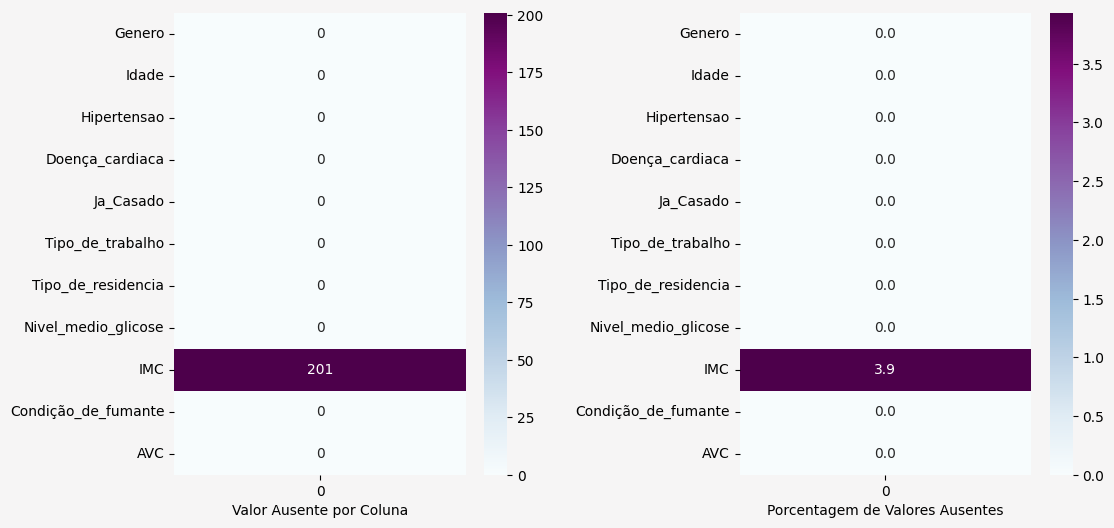

In [9]:
#Parametrização graficos
fig = plt.figure(figsize=(12, 6), dpi=100)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.55, hspace=0.5)

cor_fundo = '#f6f5f5'

fig.patch.set_facecolor(cor_fundo)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(cor_fundo)
ax1 = fig.add_subplot(gs[0, 1])
ax1.set_facecolor(cor_fundo)

#grafico 1
ax = sns.heatmap(ax=ax0, data=df_stroke.isna().sum().to_frame(), annot=True, fmt='d', cmap='BuPu')
ax.set_xlabel('Valor Ausente por Coluna')

#grafico 2
# calcular a porcentagem de valores ausentes em cada coluna
missing_perc = df_stroke.isna().mean() * 100

# plotar o gráfico
ax = sns.heatmap(ax=ax1,data = missing_perc.to_frame(), annot=True, fmt='.1f', cmap='BuPu')
ax.set_xlabel('Porcentagem de Valores Ausentes')

plt.show()




Como alternativa para esse estudo vamos optar por utilizar um modelo de ``árvore de decisão simples`` que, com base na idade e no sexo de todas as outras amostras dará uma previsão justa para os valores ausentes.



In [10]:
# Cria um pipeline para padronizar os recursos e ajustar um modelo de árvore de decisão
df_stroke_imc_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('lr', DecisionTreeRegressor(random_state=42))
])
# Seleciona as colunas relevantes do dataframe e codifica o Genero como valores numéricos
X = df_stroke[['Idade', 'Genero', 'IMC']].copy()
X['Genero'] = X['Genero'].replace({'Male': 0, 'Female': 1, 'Other': -1}).astype(int)

# Separa as amostras com valores de IMC faltantes
missing = X[X['IMC'].isna()]

# Ajusta o modelo com as amostras que têm valores de IMC
X = X[~X['IMC'].isna()]
Y = X.pop('IMC')
df_stroke_imc_pipe.fit(X, Y)

# Faz as previsões de IMC faltantes e preenche os valores previstos no dataframe original
predicted_imc = pd.Series(df_stroke_imc_pipe.predict(missing[['Idade', 'Genero']]), index=missing.index)
df_stroke.loc[missing.index, 'IMC'] = predicted_imc

#### 4.3.5 Informações do DataFrame final

In [11]:
# Dataframe sem valores Ausente
df_stroke.isnull().sum()

Genero                 0
Idade                  0
Hipertensao            0
Doença_cardiaca        0
Ja_Casado              0
Tipo_de_trabalho       0
Tipo_de_residencia     0
Nivel_medio_glicose    0
IMC                    0
Condição_de_fumante    0
AVC                    0
dtype: int64

## 5. Análise e Exploração dos Dados 

### Estatística descritiva dos dados

Essas informações permitem obter uma visão geral sobre as características dos dados, como a variação, a distribuição e a centralidade. Além disso, o "describe()" também pode fornecer informações sobre as variáveis categóricas, como a contagem, o número de valores exclusivos (unique), o valor mais frequente (top) e a frequência do valor mais frequente (freq).
  
- O comando ``describe()`` exibe prioritariamente os campos numéricos. Os campos categóricos são exibidos isoladamente.


In [12]:
# Campos Numericos 
print("\nExibindo apenas os campos numéricos:\n{0}\n".format(df_stroke.describe()))

# Campos Categóricos 
categ = df_stroke.dtypes[df_stroke.dtypes == "object"].index
print("\nExibindo apenas os campos categóricos:\n{0}\n".format(df_stroke[categ].describe(), sep='\n'))



Exibindo apenas os campos numéricos:
             Idade  Hipertensao  Doença_cardiaca  Nivel_medio_glicose          IMC          AVC
count  5110.000000  5110.000000      5110.000000          5110.000000  5110.000000  5110.000000
mean     43.215264     0.097456         0.054012           106.147677    28.919073     0.048728
std      22.633866     0.296607         0.226063            45.283560     7.730623     0.215320
min       0.000000     0.000000         0.000000            55.120000    10.300000     0.000000
25%      25.000000     0.000000         0.000000            77.245000    23.700000     0.000000
50%      45.000000     0.000000         0.000000            91.885000    28.300000     0.000000
75%      61.000000     0.000000         0.000000           114.090000    32.900000     0.000000
max      82.000000     1.000000         1.000000           271.740000    97.600000     1.000000


Exibindo apenas os campos categóricos:
        Genero Ja_Casado Tipo_de_trabalho Tipo_de_residen

#### 5.1.1 Quantificando volume de pacientes que tiveram AVC no cojunto de dados.


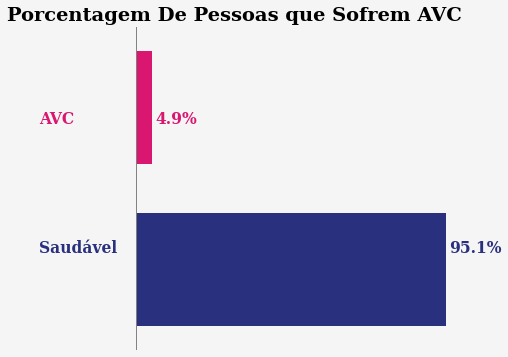

In [13]:

# calcular a porcentagem de observações com e sem AVC
avc_count = df_stroke['AVC'].value_counts()
avc_percent = 100 * avc_count / len(df_stroke)

# criar a figura e os eixos
fig, ax = plt.subplots(figsize=(6, 6), dpi=70)

# criar fundo
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# plotar as barras
ax.barh([0], avc_percent[0], height=0.7, color='#29307d')
ax.barh([1], avc_percent[1], height=0.7, color='#d91770')

# adicionar os rótulos
plt.text(-30, 0.1, 'Saudável', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#29307d'})
plt.text(-30, 0.9, 'AVC', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#d91770'})
plt.text(avc_percent[0] + 1, 0.1, f'{avc_percent[0]:.1f}%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#29307d'})
plt.text(avc_percent[1] + 1, 0.9, f'{avc_percent[1]:.1f}%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#d91770'})

# configurar os eixos
ax.set_xlim(0, 100)
ax.set_ylim(-0.5, 1.5)
ax.axvline(x=0, color='gray', linewidth=1) 
ax.set_axis_off()

# adicionar o título
ax.set_title('Porcentagem De Pessoas que Sofrem AVC',font= 'Serif', fontsize=20, fontweight='bold',loc='right')

plt.show()


#### 5.1.2 Porcentagem casos de AVC por Genero

In [14]:
# Selecionar apenas casos de AVC
df_stroke_avc = df_stroke[df_stroke['AVC'] == 1]

# Contar o número de homens e mulheres com AVC
male_count = df_stroke_avc[df_stroke_avc['Genero'] == 'Male']['Genero'].count()
female_count = df_stroke_avc[df_stroke_avc['Genero'] == 'Female']['Genero'].count()

# Calcular a porcentagem de homens e mulheres com AVC
male_percentage = (male_count / df_stroke_avc['Genero'].count()) * 100
female_percentage = (female_count / df_stroke_avc['Genero'].count()) * 100

print(f"Porcentagem de Female com AVC: {female_percentage:.2f}%")
print(f"Porcentagem de Male com AVC: {male_percentage:.2f}%")


Porcentagem de Female com AVC: 56.63%
Porcentagem de Male com AVC: 43.37%


#### 5.1.3 Analise de distribuição dos atributos

Normalidade dos dados de Gênero por Idade

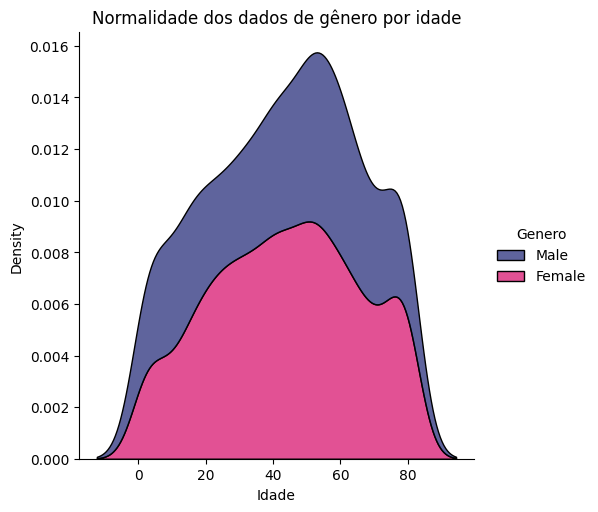

In [15]:

df_stroke_gender = df_stroke.loc[df_stroke['Genero'].isin(['Male', 'Female'])]
sns.displot(df_stroke_gender, x="Idade", hue="Genero", kind="kde", multiple='stack',palette=['#29307d','#d91770'])
plt.title("Normalidade dos dados de gênero por idade")
plt.show()

#### 5.1.3.1 Distribuição de AVC por Nível Médio de Glicose

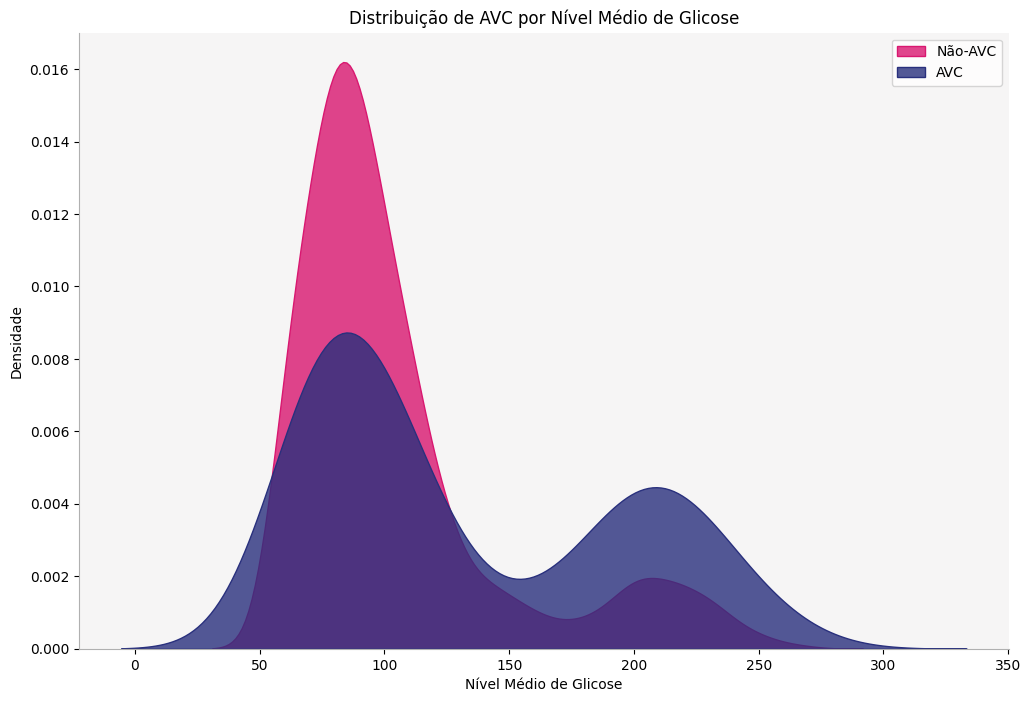

In [16]:
sns.set_palette(sns.color_palette(['#d91770','#29307d']))

fig, ax = plt.subplots(figsize=(12, 8))

sns.kdeplot(x='Nivel_medio_glicose', data=df_stroke[df_stroke['AVC'] == 0], shade=True, ax=ax, alpha=0.8, label='Não-AVC')
sns.kdeplot(x='Nivel_medio_glicose', data=df_stroke[df_stroke['AVC'] == 1], shade=True, ax=ax, alpha=0.8, label='AVC')

plt.xlabel('Nível Médio de Glicose')
plt.ylabel('Densidade')
plt.title('Distribuição de AVC por Nível Médio de Glicose')

ax.set_facecolor('#f6f5f5')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#b0b0b0')
ax.spines['left'].set_color('#b0b0b0')

plt.legend()
plt.show()

#### 5.1.3.2. Distribuição de AVC por IMC

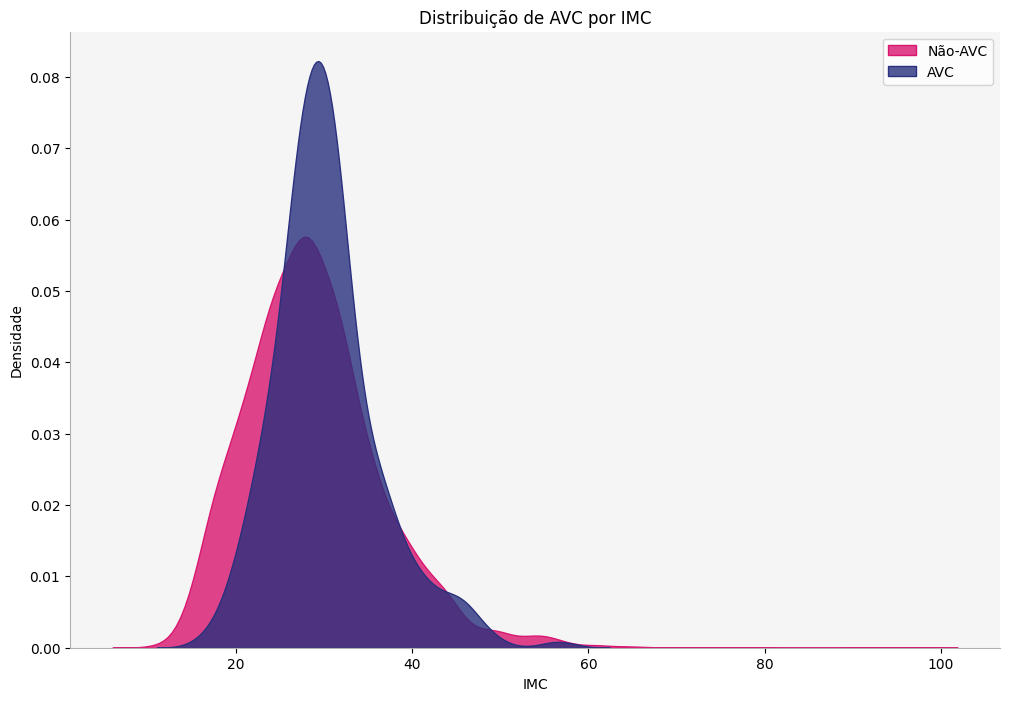

In [17]:
sns.set_palette(sns.color_palette(['#d91770','#29307d']))

fig, ax = plt.subplots(figsize=(12, 8))

sns.kdeplot(x='IMC', data=df_stroke[df_stroke['AVC'] == 0], shade=True, ax=ax, alpha=0.8, label='Não-AVC')
sns.kdeplot(x='IMC', data=df_stroke[df_stroke['AVC'] == 1], shade=True, ax=ax, alpha=0.8, label='AVC')

plt.xlabel('IMC')
plt.ylabel('Densidade')
plt.title('Distribuição de AVC por IMC')

ax.set_facecolor('#f6f5f5')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#b0b0b0')
ax.spines['left'].set_color('#b0b0b0')

plt.legend()
plt.show()


#### 5.1.3.3.	Distribuição de AVC por Idade

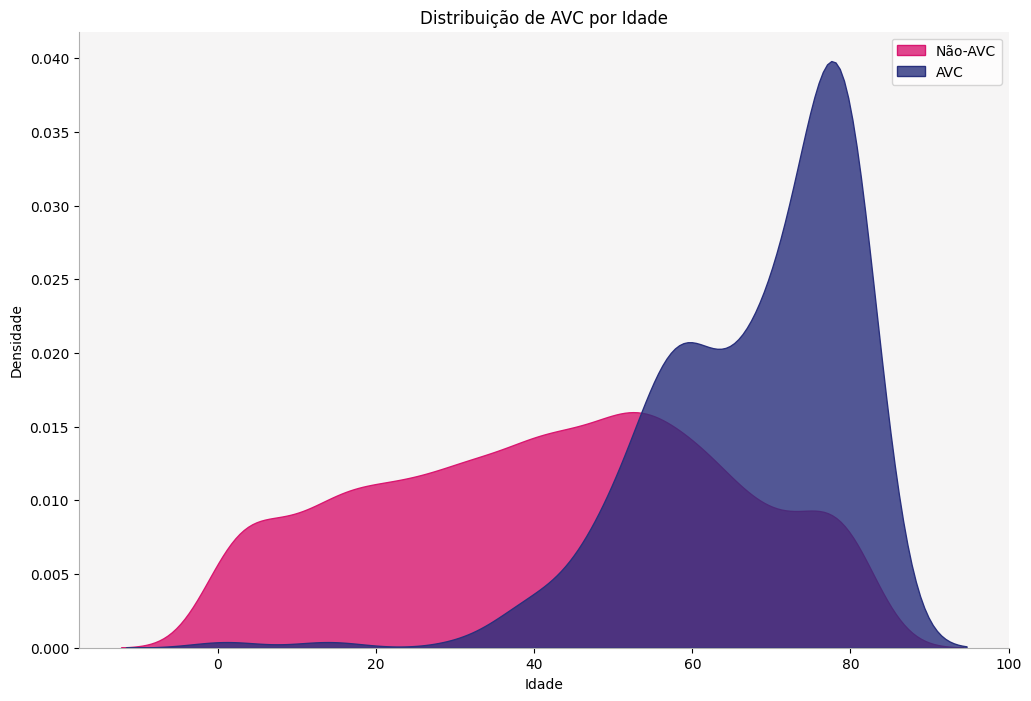

In [18]:
sns.set_palette(sns.color_palette(['#d91770','#29307d']))

fig, ax = plt.subplots(figsize=(12, 8))

sns.kdeplot(x='Idade', data=df_stroke[df_stroke['AVC'] == 0], shade=True, ax=ax, alpha=0.8, label='Não-AVC')
sns.kdeplot(x='Idade', data=df_stroke[df_stroke['AVC'] == 1], shade=True, ax=ax, alpha=0.8, label='AVC')

plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.title('Distribuição de AVC por Idade')

ax.set_facecolor('#f6f5f5')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#b0b0b0')
ax.spines['left'].set_color('#b0b0b0')

plt.legend()
plt.show()


#### 5.2. Histórico de Doença Cardíaca e Hipertensão no conjunto de dados. 


In [19]:
# Função para calcular a porcentagem de Doença Cardiaca e Hipertensão
def stacked_bar(df, attr, label_attr, label1, label2, title, ax):
    positivo = pd.DataFrame(df[df[label_attr] == 1][attr].value_counts())
    positivo["Percentage"] = positivo[attr].apply(lambda x: x/sum(positivo[attr])*100)
    negativo = pd.DataFrame(df[df[label_attr] == 0][attr].value_counts())
    negativo["Percentage"] = negativo[attr].apply(lambda x: x/sum(negativo[attr])*100)

    # Definir configuração e cor das barras. 
    x = np.arange(len(positivo))
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
    ax.bar(x, height=positivo["Percentage"], zorder=3, color="#29307d", width=0.4)
    ax.bar(x + 0.4, height=negativo["Percentage"], zorder=3, color="#d91770", width=0.4)
    ax.set_xticks(x + 0.2)
    ax.set_xticklabels([label1,label2])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(20))
    for i,j in zip(x, positivo["Percentage"]):
        ax.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f5f5', horizontalalignment='center', verticalalignment='center')
    for i,j in zip(x, negativo["Percentage"]):
        ax.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f5f5', horizontalalignment='center', verticalalignment='center')
    ax.set_title(title, fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

In [20]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Genero               5110 non-null   object 
 1   Idade                5110 non-null   int32  
 2   Hipertensao          5110 non-null   int64  
 3   Doença_cardiaca      5110 non-null   int64  
 4   Ja_Casado            5110 non-null   object 
 5   Tipo_de_trabalho     5110 non-null   object 
 6   Tipo_de_residencia   5110 non-null   object 
 7   Nivel_medio_glicose  5110 non-null   float64
 8   IMC                  5110 non-null   float64
 9   Condição_de_fumante  5110 non-null   object 
 10  AVC                  5110 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 419.3+ KB


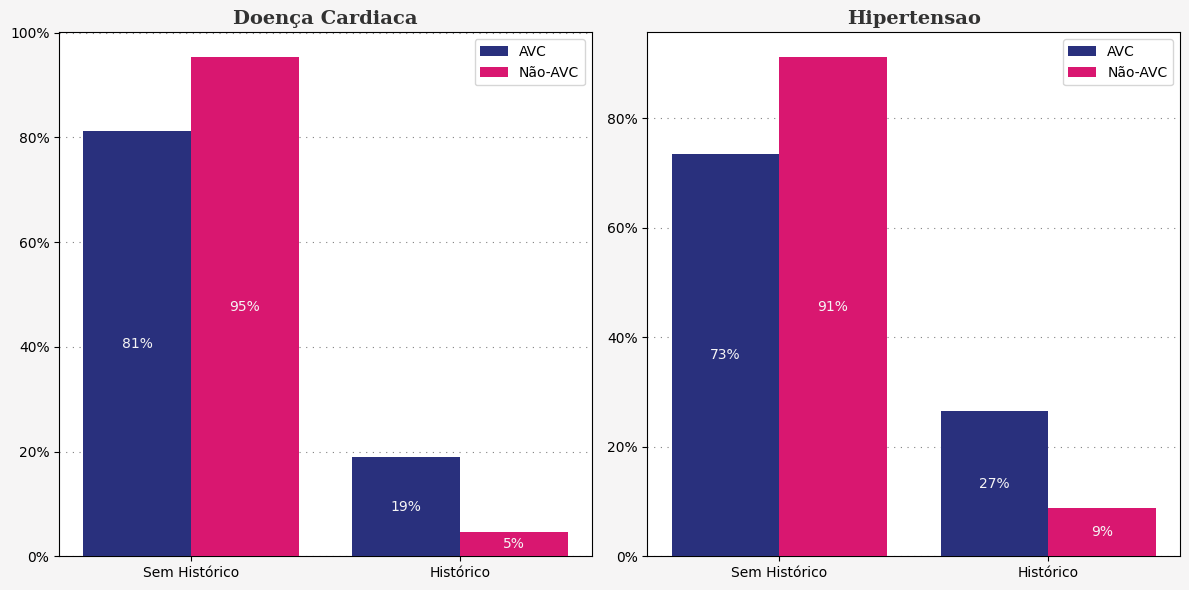

In [21]:
# Cor de fundo
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.patch.set_facecolor("#f6f5f5")

# Plotando o gráfico 
stacked_bar(df_stroke, "Doença_cardiaca", "AVC", "Sem Histórico", "Histórico", "Doença Cardiaca", ax=axs[0])
stacked_bar(df_stroke, "Hipertensao", "AVC", "Sem Histórico", "Histórico", "Hipertensao", ax=axs[1])

axs[0].legend(["AVC", "Não-AVC"], loc='upper right')
axs[1].legend(["AVC", "Não-AVC"], loc='upper right')

plt.tight_layout()
plt.show()



#### 5.3 Analise visual dos atributos Categóricos 

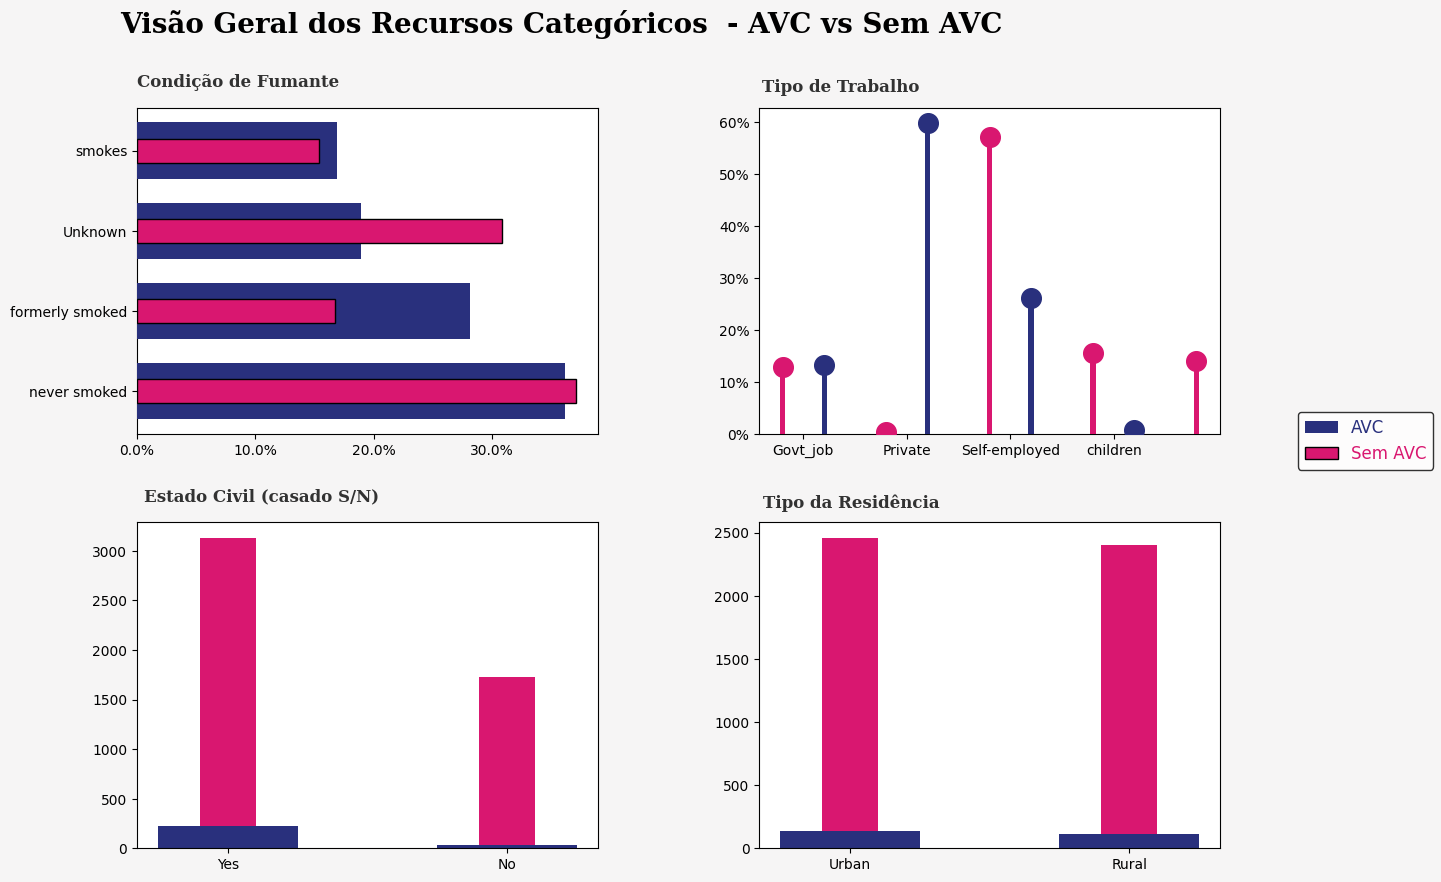

In [22]:
# Filtro Sim/Não AVC
s_avc = df_stroke[df_stroke['AVC'] == 1]
n_avc = df_stroke[df_stroke['AVC'] == 0]

# Deletando categoria 'Other' do atributo genero
n_avc = n_avc[(n_avc['Genero'] != 'Other')]

# Parametros de layout dos gráficos
fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)

# Paleta de cor
N_AVC_cor = '#d91770'
AVC_cor = '#29307d'

# Posição de cada gráfico
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])

fig.patch.set_facecolor(cor_fundo) # figure background color

# Gráficos
# Condição de Fumante
positivo = pd.DataFrame(s_avc["Condição_de_fumante"].value_counts())
positivo["Percentage"] = positivo["Condição_de_fumante"].apply(lambda x: x/sum(positivo["Condição_de_fumante"])*100)
negativo = pd.DataFrame(n_avc["Condição_de_fumante"].value_counts())
negativo["Percentage"] = negativo["Condição_de_fumante"].apply(lambda x: x/sum(negativo["Condição_de_fumante"])*100)

ax1.text(0, 3.8, 'Condição de Fumante', fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(positivo.index, positivo['Percentage'], color=AVC_cor, zorder=3, height=0.7)
ax1.barh(negativo.index, negativo['Percentage'], color=N_AVC_cor, zorder=3,ec='black', height=0.3)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

# Work Type
positivo = pd.DataFrame(s_avc["Tipo_de_trabalho"].value_counts())
positivo["Percentage"] = positivo["Tipo_de_trabalho"].apply(lambda x: x/sum(positivo["Tipo_de_trabalho"])*100)
positivo = positivo.sort_index()
negativo = pd.DataFrame(n_avc["Tipo_de_trabalho"].value_counts())
negativo["Percentage"] = negativo["Tipo_de_trabalho"].apply(lambda x: x/sum(negativo["Tipo_de_trabalho"])*100)
negativo = negativo.sort_index()

ax2.bar(negativo.index, height=negativo["Percentage"], zorder=3, color=N_AVC_cor, width=0.05)
ax2.scatter(negativo.index, negativo["Percentage"], zorder=3,s=200, color=N_AVC_cor)
ax2.bar(np.arange(len(positivo.index))+0.4, height=positivo["Percentage"], zorder=3, color=AVC_cor, width=0.05)
ax2.scatter(np.arange(len(positivo.index))+0.4, positivo["Percentage"], zorder=3,s=200, color=AVC_cor)

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax2.set_xticks(np.arange(len(positivo.index))+0.4 / 2)
ax2.set_xticklabels(list(positivo.index),rotation=0)
ax2.text(-0.2, 66, 'Tipo de Trabalho', fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")

# Já Se Casou?
s_avc = df_stroke[df_stroke['AVC'] == 1].Ja_Casado.value_counts()
n_avc = df_stroke[df_stroke['AVC'] == 0].Ja_Casado.value_counts()

ax3.bar( n_avc.index , height = n_avc.values, width = 0.2,color = N_AVC_cor)
ax3.bar( np.arange(len(s_avc.index)) , height = s_avc.values, width = 0.5,color= AVC_cor )
ax3.set_xticklabels(n_avc.index)
ax3.text(-0.3,3500, 'Estado Civil (casado S/N)', fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")

# Residence_type
s_avc = df_stroke[df_stroke['AVC'] == 1].Tipo_de_residencia.value_counts()
n_avc = df_stroke[df_stroke['AVC'] == 0].Tipo_de_residencia.value_counts()

ax4.bar( n_avc.index , height = n_avc.values, width = 0.2,color = N_AVC_cor)
ax4.bar( np.arange(len(s_avc.index)) , height = s_avc.values, width = 0.5,color= AVC_cor)
ax4.set_xticklabels(n_avc.index)
ax4.text(-0.31,2700, 'Tipo da Residência', fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")

# Titulo
fig.text(0.4,0.93, 'Visão Geral dos Recursos Categóricos  - AVC vs Sem AVC', {'font':'Serif', 'color':'black','size':20, 'weight':'bold'})


# Legenda
leg = fig.legend(['AVC', 'Sem AVC'], loc='center right', fontsize=12, facecolor='white', edgecolor='black',
                 labelcolor=[AVC_cor, N_AVC_cor])

plt.show()



#### 5.3.1.	Matriz de Correlação  


Ajuste dos Atributos Categóricos

In [23]:
df_stroke['Genero'] = df_stroke['Genero'].map({'Male':0, 'Female':1, 'Other':2})
df_stroke['Tipo_de_residencia'] = df_stroke['Tipo_de_residencia'].map({'Urban':0, 'Rural':1})
df_stroke['Condição_de_fumante'] = df_stroke['Condição_de_fumante'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
df_stroke['Ja_Casado'] = df_stroke['Ja_Casado'].map({'Yes':0, 'No':1})
df_stroke['Tipo_de_trabalho'] = df_stroke['Tipo_de_trabalho'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

Conferindo se os atributos Categóricos foram ajustados para numéricos corretamento

In [24]:
df_stroke.tail()

,Genero,Idade,Hipertensao,Doença_cardiaca,Ja_Casado,Tipo_de_trabalho,Tipo_de_residencia,Nivel_medio_glicose,IMC,Condição_de_fumante,AVC
5105,1,80,1,0,0,0,0,83.75,28.476923,1,0
5106,1,81,0,0,0,1,0,125.20,40.000000,1,0
5107,1,35,0,0,0,1,1,82.99,30.600000,1,0
5108,0,51,0,0,0,0,1,166.29,25.600000,0,0
5109,1,44,0,0,0,2,0,85.28,26.200000,3,0


#### 5.3.1.1 Gráfico da Matriz de Correlação  

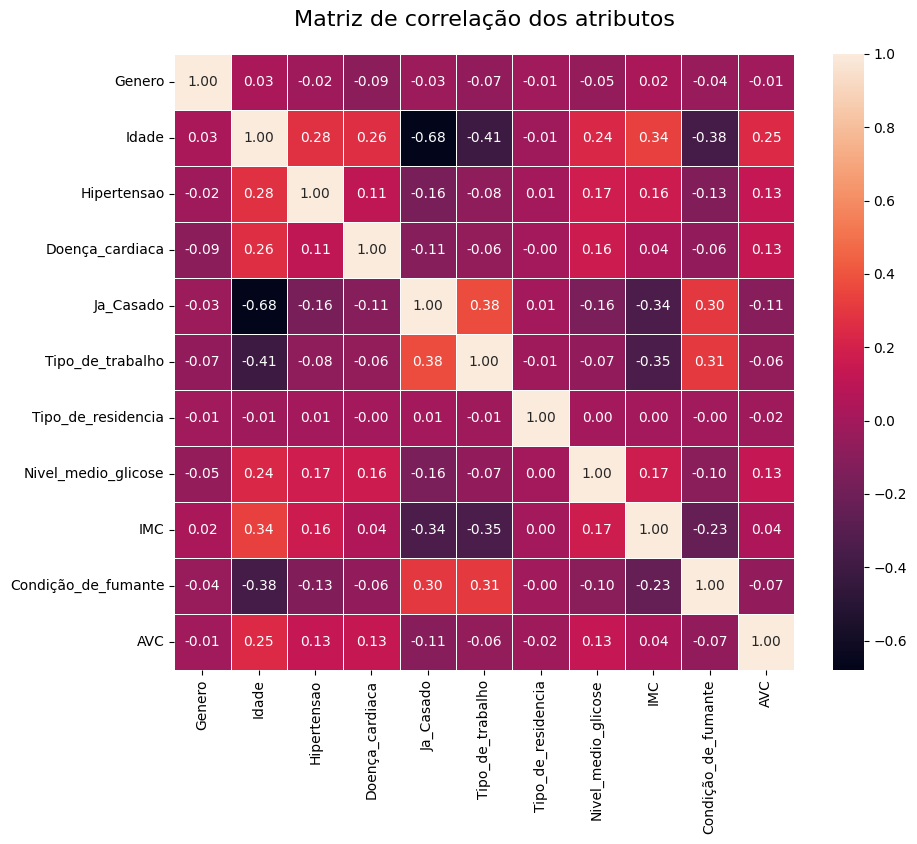

In [25]:
# Correlação dos dados
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_stroke.corr(), annot=True, linewidth=0.5, fmt='0.2f')
ax.set_title('Matriz de correlação dos atributos', fontsize=16, pad=20)
plt.show()



#### 5.3.1.2. Classificando a Matriz de Correlação  

In [26]:
# Gerando um dataframe para Classificação de Matrix de correlação
mat_corr = df_stroke.corr(method='pearson') 
corr_par = mat_corr.unstack()
corr_par


Genero               Genero                 1.000000
                     Idade                  0.027404
                     Hipertensao           -0.021390
                     Doença_cardiaca       -0.085749
                     Ja_Casado             -0.029366
                     Tipo_de_trabalho      -0.066212
                     Tipo_de_residencia    -0.005529
                     Nivel_medio_glicose   -0.054213
                     IMC                    0.024680
                     Condição_de_fumante   -0.039693
                     AVC                   -0.009200
Idade                Genero                 0.027404
                     Idade                  1.000000
                     Hipertensao            0.276303
                     Doença_cardiaca        0.263668
                     Ja_Casado             -0.679181
                     Tipo_de_trabalho      -0.413852
                     Tipo_de_residencia    -0.014169
                     Nivel_medio_glicose    0.

In [27]:
# Ordenando valores da Matrix de correlação
par_sorted = corr_par.sort_values(kind="quicksort")
print(par_sorted)


Ja_Casado            Idade                 -0.679181
Idade                Ja_Casado             -0.679181
Tipo_de_trabalho     Idade                 -0.413852
Idade                Tipo_de_trabalho      -0.413852
                     Condição_de_fumante   -0.376142
Condição_de_fumante  Idade                 -0.376142
Tipo_de_trabalho     IMC                   -0.349450
IMC                  Tipo_de_trabalho      -0.349450
                     Ja_Casado             -0.343286
Ja_Casado            IMC                   -0.343286
Condição_de_fumante  IMC                   -0.234709
IMC                  Condição_de_fumante   -0.234709
Hipertensao          Ja_Casado             -0.164243
Ja_Casado            Hipertensao           -0.164243
Nivel_medio_glicose  Ja_Casado             -0.155068
Ja_Casado            Nivel_medio_glicose   -0.155068
Hipertensao          Condição_de_fumante   -0.129012
Condição_de_fumante  Hipertensao           -0.129012
Doença_cardiaca      Ja_Casado             -0.

#### 5.3.1.3 Correlação Negativa  
Valores negativos 

In [28]:
# Imprimindo somente correlações negativas 
par_corr_negativos = par_sorted[par_sorted < 0]
print(par_corr_negativos)


Ja_Casado            Idade                 -0.679181
Idade                Ja_Casado             -0.679181
Tipo_de_trabalho     Idade                 -0.413852
Idade                Tipo_de_trabalho      -0.413852
                     Condição_de_fumante   -0.376142
Condição_de_fumante  Idade                 -0.376142
Tipo_de_trabalho     IMC                   -0.349450
IMC                  Tipo_de_trabalho      -0.349450
                     Ja_Casado             -0.343286
Ja_Casado            IMC                   -0.343286
Condição_de_fumante  IMC                   -0.234709
IMC                  Condição_de_fumante   -0.234709
Hipertensao          Ja_Casado             -0.164243
Ja_Casado            Hipertensao           -0.164243
Nivel_medio_glicose  Ja_Casado             -0.155068
Ja_Casado            Nivel_medio_glicose   -0.155068
Hipertensao          Condição_de_fumante   -0.129012
Condição_de_fumante  Hipertensao           -0.129012
Doença_cardiaca      Ja_Casado             -0.

#### 5.3.1.4 Seleção de Correlação Forte (magnitude 0,5)

In [29]:
par_corr_forte = par_sorted[abs(par_sorted) > 0.5]
print(par_corr_forte)


Ja_Casado            Idade                 -0.679181
Idade                Ja_Casado             -0.679181
Genero               Genero                 1.000000
Tipo_de_trabalho     Tipo_de_trabalho       1.000000
IMC                  IMC                    1.000000
Nivel_medio_glicose  Nivel_medio_glicose    1.000000
Tipo_de_residencia   Tipo_de_residencia     1.000000
Ja_Casado            Ja_Casado              1.000000
Doença_cardiaca      Doença_cardiaca        1.000000
Hipertensao          Hipertensao            1.000000
Idade                Idade                  1.000000
Condição_de_fumante  Condição_de_fumante    1.000000
AVC                  AVC                    1.000000
dtype: float64


Por fim, analisamos a correlação entre o AVC e as demais variáveis do conjunto de dados, mas a correlação perfeita da variável "AVC" consigo mesma não possibilitou identificar relações com outras variáveis. Essa análise é relevante para criar modelos de aprendizado de máquina, e técnicas serão apresentadas na próxima sessão para melhorar a precisão do modelo de predição de AVC com base em fatores de risco.

In [30]:
avc_corr_forte = mat_corr["AVC"][abs(mat_corr["AVC"]) > 0.5]
print(avc_corr_forte)


AVC    1.0
Name: AVC, dtype: float64


#### 5.3.2	Assimetria dos atributos

In [31]:
# Assimetria e ordenação dos resultados
df_stroke.skew().sort_values(kind="quicksort")


Genero                -0.345664
Idade                 -0.140425
Tipo_de_residencia     0.032107
Condição_de_fumante    0.077863
Ja_Casado              0.657745
Tipo_de_trabalho       0.972287
IMC                    1.048490
Nivel_medio_glicose    1.572284
Hipertensao            2.715392
Doença_cardiaca        3.947244
AVC                    4.193284
dtype: float64

#### 5.3.2.1 Representação Gráfica da Assimetria dos Atributos

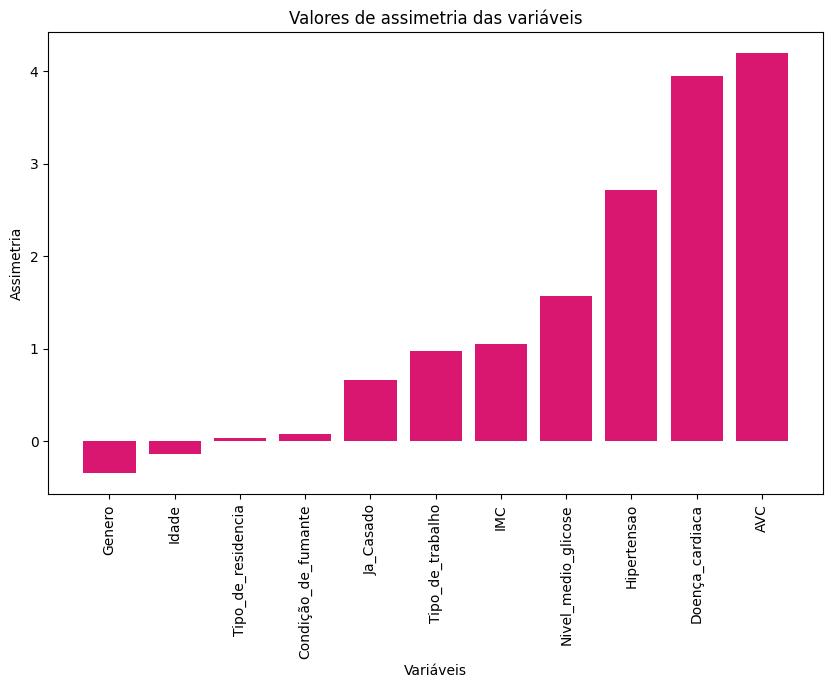

In [32]:

# Calcular os valores de assimetria das variáveis
skewness = df_stroke.skew().sort_values(kind="quicksort")

# Criar um gráfico de barras verticais
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(skewness.index, skewness.values)

# Adicionar rótulos e título
ax.set_xlabel('Variáveis')
ax.set_ylabel('Assimetria')
ax.set_title('Valores de assimetria das variáveis')
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.show()


## 6. Preparação dos Dados para Modelos de Aprendizado de Máquina

Nesta etapa, aplicaremos tratamentos específicos para o(s) modelo(s) de Aprendizado de Máquina escolhido(s). Criaremos novos atributos e aplicaremos técnicas de balanceamento na base de dados. Ao final, teremos uma base separada com dados de treino, validação e teste.

#### 6.1 Criação de Atributos

Criação dos atribuidos com base nas fontes: 

 http://tabnet.datasus.gov.br/cgi/SISVAN/CNV/notas_sisvan.html
 
 https://abeso.org.br/qual-o-valor-normal-da-glicemia-saiba-o-que-e-e-como-medir-corretamente/


In [33]:
# Criando Atributos 
df_stroke['IMC_Cat'] = (pd.cut(df_stroke['IMC'], bins = [0, 19, 25,30,10000]
                                               , labels = ['Abaixo do Peso', 'Ideal', 'Sobrepeso', 'Obesidade']))

df_stroke['Glicose_Cat'] = (pd.cut(df_stroke['Nivel_medio_glicose'], bins = [0,70,100,200,500]
                                                                   , labels = ['Baixo', 'Normal', 'Alto', 'Muito Alto']))

df_stroke['Idade_Cat'] = (pd.cut(df_stroke['Idade'], bins = [-1,13,18,45,60,200]
                                                   , labels = ['Criança', 'Adolescente', 'Adulto','Adulto Meia Idade','Idoso']))

#### 6.2 Tratamentos de dados categóricas

 A maioria dos algoritmos de aprendizado de máquina lida apenas com dados numéricos, portanto, é essencial converter variáveis categóricas em uma representação numérica adequada. O OneHotEncoder desempenha um papel crucial nesse processo, pois permite transformar variáveis categóricas em vetores one-hot. Isso contribui para melhorar a precisão dos modelos e a qualidade das previsões ou classificações resultantes.

In [34]:
# Identifique as colunas categóricas
categorical_cols = df_stroke.select_dtypes(include=['category']).columns

# Selecione apenas as colunas categóricas
categorical_data = df_stroke[categorical_cols]

# Crie uma instância do OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Ajuste e transforme os dados categóricos usando o OneHotEncoder
encoded_data = encoder.fit_transform(categorical_data)

# Crie um DataFrame com as colunas codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatene as colunas codificadas com as outras colunas do DataFrame original
df_encoded = pd.concat([df_stroke.drop(categorical_cols, axis=1), encoded_df], axis=1)


In [35]:
df_encoded.dtypes

Genero                           int64
Idade                            int32
Hipertensao                      int64
Doença_cardiaca                  int64
Ja_Casado                        int64
Tipo_de_trabalho                 int64
Tipo_de_residencia               int64
Nivel_medio_glicose            float64
IMC                            float64
Condição_de_fumante              int64
AVC                              int64
IMC_Cat_Abaixo do Peso         float64
IMC_Cat_Ideal                  float64
IMC_Cat_Obesidade              float64
IMC_Cat_Sobrepeso              float64
Glicose_Cat_Alto               float64
Glicose_Cat_Baixo              float64
Glicose_Cat_Muito Alto         float64
Glicose_Cat_Normal             float64
Idade_Cat_Adolescente          float64
Idade_Cat_Adulto               float64
Idade_Cat_Adulto Meia Idade    float64
Idade_Cat_Criança              float64
Idade_Cat_Idoso                float64
dtype: object

#### 6.3 Importância das  variáveis

O código utilizado abaixo calcula e exibi a importância relativa de cada variável (característica) no conjunto de dados. 
Através do ExtraTreesClassifier e do cálculo das importâncias das características, é possível determinar quais variáveis são mais relevantes para o modelo e têm maior influência na classificação dos dados.

Classificação das variavéis:
1. feature 7 (0.183914)
2. feature 1 (0.178177)
3. feature 8 (0.169837)
4. feature 9 (0.095625)
5. feature 5 (0.066060)
6. feature 6 (0.045931)
7. feature 0 (0.043173)
8. feature 22 (0.030966)
9. feature 2 (0.030128)
10. feature 3 (0.025378)
11. feature 4 (0.023033)
12. feature 12 (0.016710)
13. feature 13 (0.016001)
14. feature 14 (0.014083)
15. feature 17 (0.013023)
16. feature 16 (0.010964)
17. feature 11 (0.010926)
18. feature 15 (0.009236)
19. feature 20 (0.006827)
20. feature 19 (0.006785)
21. feature 10 (0.001356)
22. feature 21 (0.001144)
23. feature 18 (0.000722)


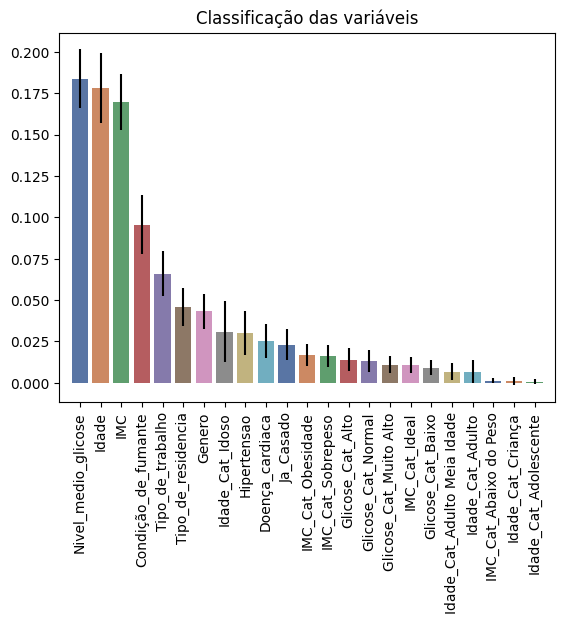

In [36]:
features = df_encoded.drop('AVC', axis=1).columns

X = df_encoded[features]
y = df_encoded['AVC']
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print Ranking das Variavéis
print("Classificação das variavéis:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotando variáveis por ordem de importancia (ExtraTreesClassifier)
plt.figure()

plt.title("Classificação das variáveis")
sns.barplot(x=np.array(features)[indices], y=importances[indices], palette="deep",yerr=std[indices])
plt.xticks(range(X.shape[1]), np.array(features)[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#### 6.4 Separando os dados de Treino e Teste

In [37]:
# Selecionando todas as colunas exceto a coluna “AVC”
X=df_encoded.drop('AVC',axis=1)


In [38]:
# Selecionando apenas valores da coluna “AVC”
Y=df_encoded['AVC']

In [39]:
# Divide o Dataframe em teste e treino
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=23)

#### 6.5 Normalização dos Dados

A normalização dos dados é uma etapa crucial para garantir que as variáveis estejam na mesma escala antes de aplicar algoritmos de aprendizado de máquina. A biblioteca scikit-learn oferece várias classes e métodos para facilitar a normalização dos dados, como o StandardScaler e o MinMaxScaler, que podem ser facilmente integrados em seu fluxo de trabalho de pré-processamento de dados. Neste projeto será utilizado a classe StandardScaler.

In [40]:
#Aplicando normalização com StandardScaler da biblioteca scikit-learn
std=StandardScaler()
X_train_std= std.fit_transform(X_train)
X_test_std= std.transform(X_test)


In [41]:
X_train_std

array([[-1.18460634, -0.83996585, -0.33342393, ..., -0.54908682,
        -0.37965324, -0.57471395],
       [ 0.84416229,  0.89227019,  2.99918489, ..., -0.54908682,
        -0.37965324,  1.73999604],
       [ 0.84416229,  0.75902126, -0.33342393, ...,  1.82120561,
        -0.37965324, -0.57471395],
       ...,
       [-1.18460634,  0.53693972, -0.33342393, ...,  1.82120561,
        -0.37965324, -0.57471395],
       [ 0.84416229,  0.35927448, -0.33342393, ...,  1.82120561,
        -0.37965324, -0.57471395],
       [ 0.84416229,  0.13719294, -0.33342393, ...,  1.82120561,
        -0.37965324, -0.57471395]])

In [42]:
X_test_std

array([[ 0.84416229, -0.0404723 , -0.33342393, ..., -0.54908682,
        -0.37965324, -0.57471395],
       [ 0.84416229,  1.73618005, -0.33342393, ..., -0.54908682,
        -0.37965324,  1.73999604],
       [ 0.84416229,  0.67018864,  2.99918489, ...,  1.82120561,
        -0.37965324, -0.57471395],
       ...,
       [ 0.84416229,  0.58135602, -0.33342393, ...,  1.82120561,
        -0.37965324, -0.57471395],
       [ 0.84416229,  1.24760065,  2.99918489, ..., -0.54908682,
        -0.37965324,  1.73999604],
       [ 0.84416229,  0.75902126, -0.33342393, ...,  1.82120561,
        -0.37965324, -0.57471395]])

#### 6.6 Balanceamento da base de dados (Oversampling)

Nesta etapa vamos combinar as tecnicas de Oversampling e SMOTE (Synthetic Minority Over-sampling Technique), O oversampling envolve aumentar a quantidade de registros da classe minoritária (casos de AVC) para equilibrar as classes, já o SMOTE cria amostras sintéticas ao calcular as diferenças entre as características dos registros vizinhos e, em seguida, aplicando essas diferenças aos registros existentes. Isso evita a duplicação exata dos dados e introduz mais variedade nas amostras sintéticas.

In [43]:
# Balanceamento da base de dados (Oversampling + SMOTE)
sm = SMOTE()
x_train_res, y_train_res = sm.fit_resample(X_train_std, Y_train)

# Imprime informações sobre as contagens de rótulos antes e após o balanceamento
print("Antes do OverSampling, contagens de rótulo '1': {}".format(sum(Y == 1)))
print("Antes do OverSampling, contagens de rótulo '0': {} \n".format(sum(Y == 0)))

print('Após OverSampling, a forma de train_x: {}'.format(x_train_res.shape))
print('Após OverSampling, a forma de train_y: {} \n'.format(y_train_res.shape))

print("Após do OverSampling, contagens de rótulo '1': {}".format(sum(y_train_res == 1)))
print("Após do OverSampling, contagens de rótulo '0': {}\n".format(sum(y_train_res == 0)))




Antes do OverSampling, contagens de rótulo '1': 249
Antes do OverSampling, contagens de rótulo '0': 4861 

Após OverSampling, a forma de train_x: (7788, 23)
Após OverSampling, a forma de train_y: (7788,) 

Após do OverSampling, contagens de rótulo '1': 3894
Após do OverSampling, contagens de rótulo '0': 3894



## 7.	Aplicação de Modelos de Aprendizado de Máquina
Após todos os tratamentos, analises, inclusão de variáveis, normalização e balanceamento realizadas nas seções anteriores, iremos aplicar modelos de Machine Learning, utilizando algoritmos de classificação sobre os dados.


In [44]:

#Função para iterar todos os modelos de classicação:
#Logistic Regression, KNN,Decision Tree Classifier, Random Forest Classifier, Ada Boost, SVM,XG Boost, Cat Boost)

def run_exp_models(x_train_res,y_train_res,X_test_std,Y_test):
    models= [['Logistic Regression ',LogisticRegression()],
            ['KNearest Neighbor ',KNeighborsClassifier()],
            ['Decision Tree Classifier ',DecisionTreeClassifier()],
            ['Random Forest Classifier ',RandomForestClassifier()],
            ['Ada Boost ',AdaBoostClassifier()],
            ['SVM ',SVC()],
            ['XG Boost',XGBClassifier()],
            ['Cat Boost',CatBoostClassifier(logging_level='Silent')]]

    models_score = []
    for name,model in models:

        model = model
        model.fit(x_train_res,y_train_res)
        model_pred = model.predict(X_test_std)
        cm_model = confusion_matrix(Y_test, model_pred)
        print(cm_model)
        models_score.append(accuracy_score(Y_test,model.predict(X_test_std)))

        print(name)
        print('Acuracidade da Validação: ',accuracy_score(Y_test,model.predict(X_test_std)))
        print('Acuracidade do Treno: ',accuracy_score(y_train_res,model.predict(x_train_res)))
        print('_________________________________________________')
       
        
    return models_score

In [45]:
models_score = run_exp_models(x_train_res, y_train_res, X_test_std, Y_test)

[[678 289]
 [ 11  44]]
Logistic Regression 
Acuracidade da Validação:  0.7064579256360078
Acuracidade do Treno:  0.7951977401129944
_________________________________________________
[[818 149]
 [ 40  15]]
KNearest Neighbor 
Acuracidade da Validação:  0.815068493150685
Acuracidade do Treno:  0.9501797637390857
_________________________________________________
[[907  60]
 [ 43  12]]
Decision Tree Classifier 
Acuracidade da Validação:  0.8992172211350293
Acuracidade do Treno:  1.0
_________________________________________________
[[942  25]
 [ 55   0]]
Random Forest Classifier 
Acuracidade da Validação:  0.9217221135029354
Acuracidade do Treno:  0.9998715973292245
_________________________________________________
[[870  97]
 [ 36  19]]
Ada Boost 
Acuracidade da Validação:  0.8698630136986302
Acuracidade do Treno:  0.9233436055469953
_________________________________________________
[[783 184]
 [ 32  23]]
SVM 
Acuracidade da Validação:  0.7886497064579256


Acuracidade do Treno:  0.9080636877247047
_________________________________________________
[[951  16]
 [ 52   3]]
XG Boost
Acuracidade da Validação:  0.9334637964774951
Acuracidade do Treno:  0.9989727786337956
_________________________________________________
[[953  14]
 [ 52   3]]
Cat Boost
Acuracidade da Validação:  0.9354207436399217
Acuracidade do Treno:  0.9910118130457114
_________________________________________________


## 8. Avaliação dos Modelos de Aprendizado de Máquina e Discussão dos Resultados
Nesta etapa, apresentaremos um breve resumo dos resultados obtidos por cada algoritmo de classificação. Utilizaremos a matriz de confusão para analisar a taxa de acertos e erros do modelo em relação às classes positiva e negativa. Além disso, utilizaremos a curva ROC (Receiver Operating Characteristic) e a métrica AUC (Area Under the Curve) para avaliar a capacidade discriminativa do modelo em diferentes pontos de corte. Essas informações nos ajudarão a comparar os  

In [46]:
# Função para plotar a matriz de confusão e a curva ROC
def plot_matrix_roc(cm, fpr, tpr, auc_score, title):
    # Configurar o subplot 
    fig = sp.make_subplots(rows=1, cols=3, subplot_titles=(f'{title} Matrix de Confusão', f'{title} ROC Curve'))

    # Plotar a matriz de confusão
    z = cm
    x = ['Não AVC', 'AVC']
    y = x
    z_text = [[str(y) for y in x] for x in z]

    # Adicionar o heatmap da matriz de confusão à primeira posição do subplot
    fig.add_trace(go.Heatmap(z=z, x=x, y=y, zmin=0, zmax=1000, colorscale='deep', showscale=False), row=1, col=1)
    for x_val in range(2):
        for y_val in range(2):
            # Adicionar as anotações aos valores da matriz de confusão
            fig.add_annotation(go.layout.Annotation(
                text=str(cm[x_val][y_val]),
                x=x[y_val],
                y=y[x_val],
                xref=f'x{1}', yref=f'y{1}',
                showarrow=False,
                font=dict(color='black', size=12)
            ))

    # Adicionar cor na matriz de confusão e a escala de cores (colorbar)
    fig.add_trace(go.Heatmap(z=z, x=x, y=y, zmin=0, zmax=1000, colorscale='deep', showscale=True, colorbar=dict(x=0.286, y=0.5)), row=1, col=1)

    # Plotar a curva ROC com preenchimento abaixo dela e texto indicando o valor da AUC
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', fill='tozeroy', fillcolor='rgba(0, 0, 255, 0.2)', line=dict(color='blue', width=2),
                             showlegend=False,), row=1, col=2),
    fig.add_trace(go.Scatter(x=[0.15], y=[0.95], mode='text', text=[f'ROC curve (AUC={auc_score:.4f})'], showlegend=False, textfont=dict(size=12, color= 'navy')), row=1, col=2)

    # Adicionar a linha pontilhada representando o classificador aleatório à segunda posição do subplot
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(color='navy', width=2, dash='dash'),
                             showlegend=False,), row=1, col=2)

    # Atualizar os rótulos dos eixos do subplot
    fig.update_xaxes(title_text='Taxa de Falso Positivo', constrain='domain', row=1, col=2)
    fig.update_yaxes(title_text='Taxa de Verdadeiro Positivo', scaleanchor='x', scaleratio=1, row=1, col=2)

    fig.update_xaxes(title_text='Valor Previsto', row=1, col=1)
    fig.update_yaxes(title_text='Valor Real', row=1, col=1)

    return fig

# Função para avaliar os modelos e plotar as análises
def avaliacao_modelos(x_train_res, y_train_res, X_test_std, Y_test):
    models = [['Logistic Regression', LogisticRegression()],
              ['KNearest Neighbor', KNeighborsClassifier()],
              ['Decision Tree Classifier', DecisionTreeClassifier()],
              ['Random Forest Classifier', RandomForestClassifier()],
              ['Ada Boost', AdaBoostClassifier()],
              ['SVM', SVC()],
              ['XG Boost', XGBClassifier()],
              ['Cat Boost', CatBoostClassifier(logging_level='Silent')]]

    models_score = []

    for i, (name, model) in enumerate(models, start=1):
        model.fit(x_train_res, y_train_res)
        model_pred = model.predict(X_test_std)
        cm_model = confusion_matrix(Y_test, model_pred)
        models_score.append(accuracy_score(Y_test, model_pred))

        # Plotar a matriz de confusão e a curva ROC para o mesmo modelo
        fpr, tpr, thresholds = roc_curve(Y_test, model_pred)
        auc_score = auc(fpr, tpr)

        # Chamar a função para plotar a matriz de confusão e a curva ROC para o modelo atual
        fig = plot_matrix_roc(cm_model, fpr, tpr, auc_score, title=name)
        
        # Atualizar o título do gráfico
        fig.update_layout(title_text=f'Análise de {name}')
        
     
        fig.show()
        
    return models_score



In [47]:
# Avaliando os modelos e plotando as análises
scores = avaliacao_modelos(x_train_res, y_train_res, X_test_std, Y_test)

## 9. Conclusão


In [48]:
def hist_score(score):
    models_names = [
        'Logistic Regression',
    'KNearest Neighbor',
    'Decision Tree Classifier',
    'Random Forest Classifier',
    'Ada Boost',
    'SVM',
    'XG Boost',
    'Cat Boost']

    plt.rcParams['figure.figsize']=20,8
    sns.set_style('darkgrid')
    ax = sns.barplot(x=models_names, y=score, palette = "inferno", saturation =2.0)
    plt.xlabel('Classificação dos Modelos', fontsize = 20 )
    plt.ylabel('% de Acuracidade', fontsize = 20)
    plt.title('Acuracidade de diferentes modelos de classificação sobre o conjunto de teste', fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 12)
    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()


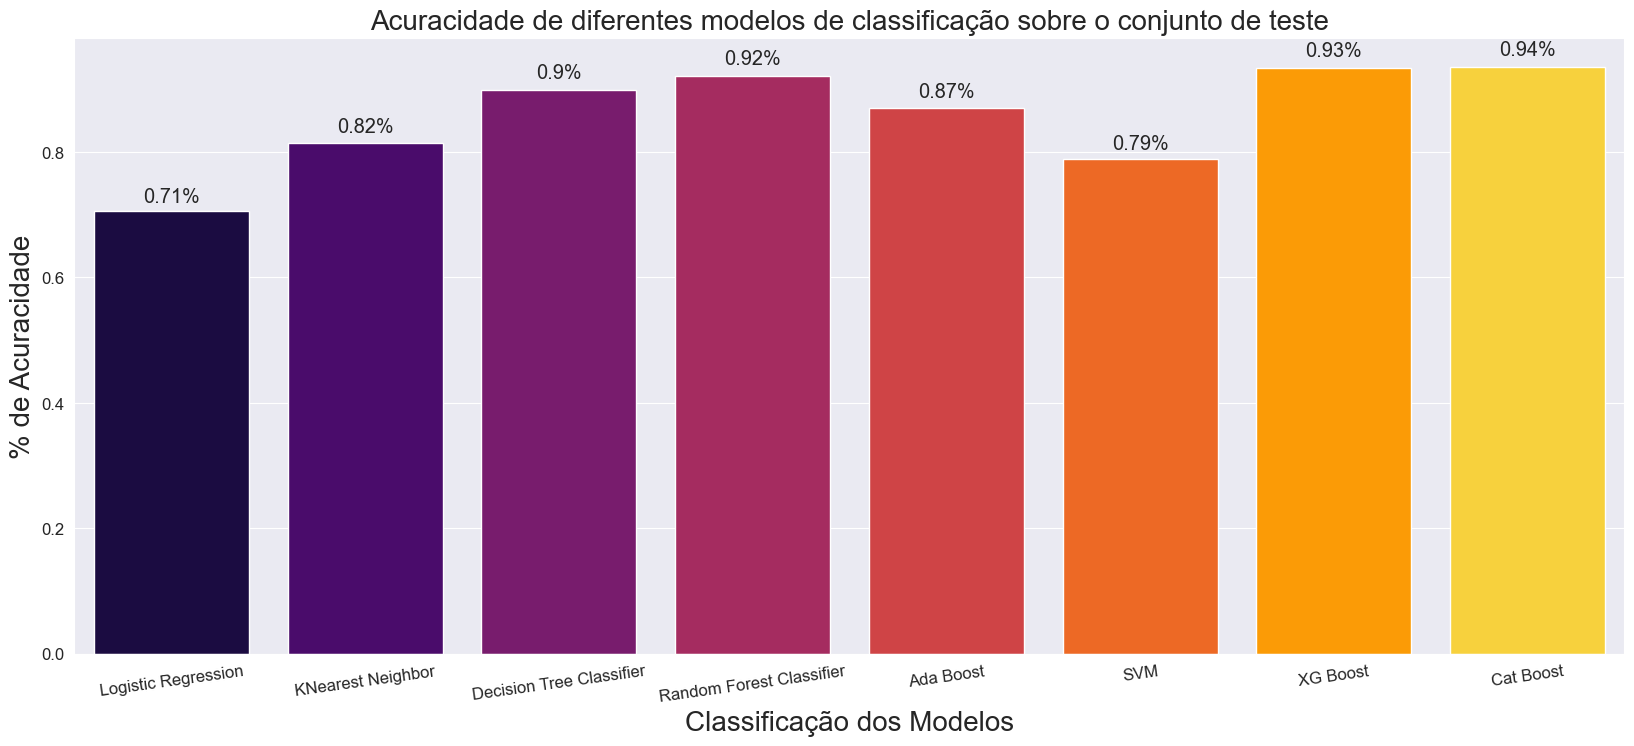

In [49]:
hist_score(models_score)

O objetivo deste estudo foi desenvolver um modelo de classificação capaz de prever a ocorrência de acidente vascular cerebral (AVC) com base em fatores de risco identificados em um conjunto de dados do Kaggle. 

Na etapa de preparação dos dados, foi realizado análise exploratória detalhada para entender a estrutura do conjunto de dados e identificar possíveis problemas, como valores faltantes e desequilíbrio das classes. Para lidar com o desequilíbrio, foi aplicado técnica de OverSampling para aumentar o número de instâncias da classe minoritária e garantir uma representação mais equilibrada das classes de AVC e não AVC.

Em seguida, foi utilizado diferentes algoritmos de classificação, incluindo Regressão Logística, KNearest Neighbor, Decision Tree Classifier, Random Forest Classifier, Ada Boost, SVM, XG Boost e Cat Boost, para criar os modelos preditivos. Cada modelo foi treinado e avaliado usando métricas como acurácia, precisão, recall e a curva ROC-AUC para medir seu desempenho e capacidade de generalização.

Os resultados obtidos foram promissores, com diversos modelos alcançando altas taxas de acurácia e AUC, indicando uma boa capacidade de classificação. Dentre eles, o modelo Cat Boost se destacou com a maior acurácia de validação (93.64%), seguido pelo XG Boost (93.05%) e Random Forest Classifier (92.27%).